In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
from sklearn.linear_model import LinearRegression
%matplotlib inline
font = FontProperties(fname='/Library/Fonts/Arial Unicode.ttf')

In [2]:
df = pd.read_csv('housing-data.txt', sep='\s+', header=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


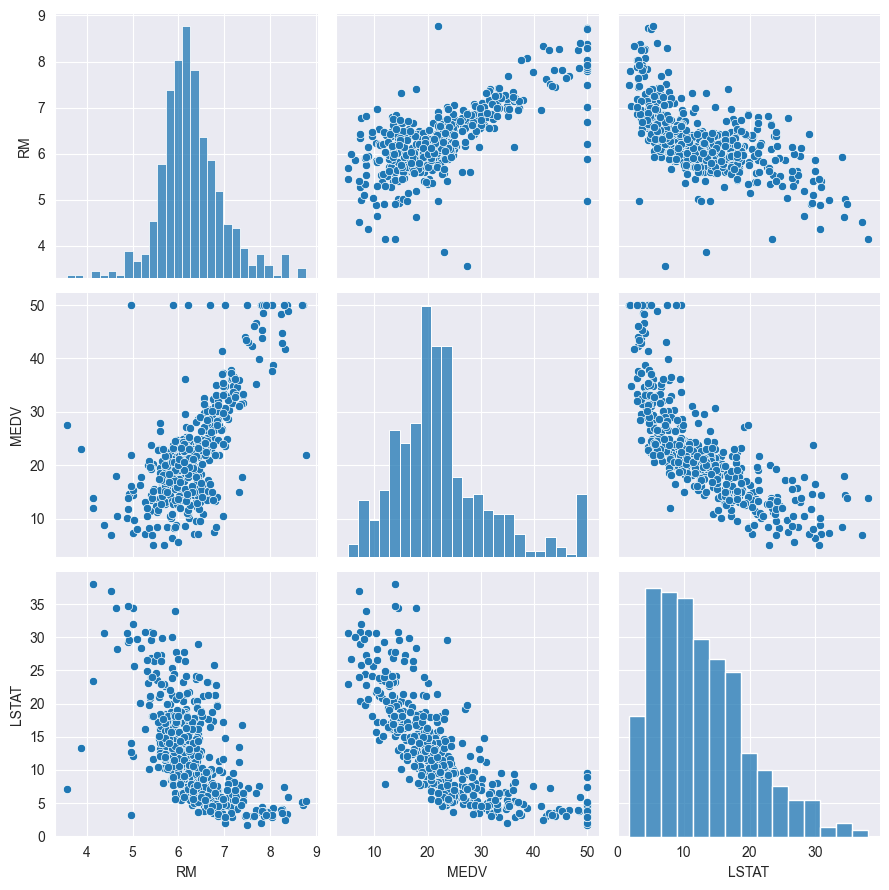

In [3]:
# 选择三列特征
cols = ['RM', 'MEDV', 'LSTAT']
# 构造三列特征之间的联系即构造散点图矩阵
sns.pairplot(df[cols], height=3)
plt.tight_layout()
plt.show()

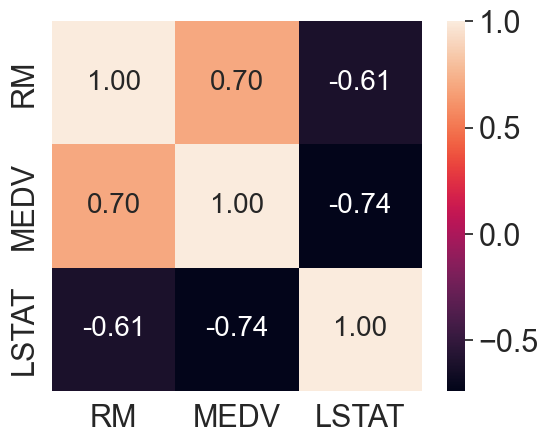

In [4]:
# 求解上述三列特征的相关系数
'''
对于一般的矩阵X，执行A=corrcoef(X)后，A中每个值的所在行a和列b，反应的是原矩阵X中相应的第a个列向量和第b个列向量的
相似程度（即相关系数）
'''
cm = np.corrcoef(df[cols].values.T)
# 控制颜色刻度即颜色深浅
sns.set(font_scale=2)
# 构造关联矩阵
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={
                 'size': 20}, yticklabels=cols, xticklabels=cols)
plt.show()

In [5]:
X = df[['RM']].values
y = df['MEDV'].values

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

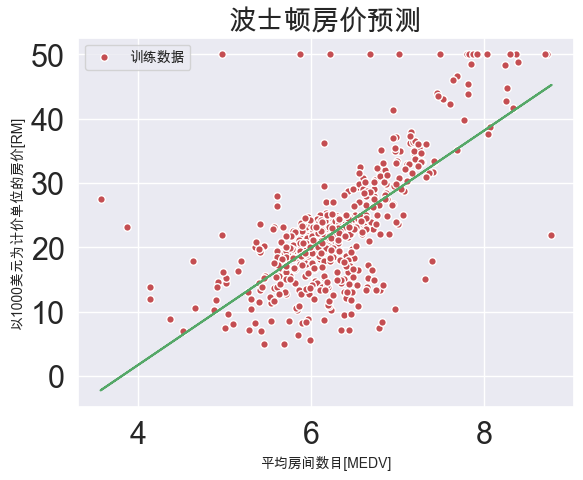

普通线性回归斜率:9.1021089811803


In [6]:
plt.scatter(X, y, c='r', s=30, edgecolor='white',label='训练数据')
plt.plot(X, lr.predict(X), c='g')
plt.xlabel('平均房间数目[MEDV]', fontproperties=font)
plt.ylabel('以1000美元为计价单位的房价[RM]', fontproperties=font)
plt.title('波士顿房价预测', fontproperties=font, fontsize=20)
plt.legend(prop=font)
plt.show()
print('普通线性回归斜率:{}'.format(lr.coef_[0]))

In [16]:
X

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [17]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [19]:
lr.predict(np.array([[7]]))

array([29.04414209])